In [5]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import pickle


#np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
sigma = 8 

warm_up = 1300 # 1.4k
d_est = 3 # Test for 0,3,6
n_iteration = 2000

d_real = 3 # Test for 0,3,6

n = 1000

n_runs = 5
pathfolder = f'runs/d_sigma_{sigma}_aic_bic_gic'

# Create the directory if it does not exist
if not os.path.exists(pathfolder):
    os.makedirs(pathfolder)

In [15]:
params_list = []
result_list = []

for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, d=d_real, sigma=sigma)
    graphs, spec = graph_model.populate_edges_baseline( warm_up = warm_up, max_iterations = n_iteration, patience = 10)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect()

    # Estimation with different values of d
    est = estimator.LogitRegEstimator(g, d=d_est)
    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)

    import pickle
    with open(f'{pathfolder}/results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl', 'wb') as f:
        pickle.dump(result_list, f)


iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.032      
Date:               2024-10-20 17:16 AIC:              17487.5869 
No. Observations:   499500           BIC:              17520.9510 
Df Model:           2                Log-Likelihood:   -8740.8    
Df Residuals:       499497           LL-Null:          -9029.0    
Converged:          1.0000           LLR p-value:      6.9938e-126
No. Iterations:     20.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.2331     0.0658   -109.9477   0.0000   -7.3621   -7.1042
x1        0.0083     0.0005     17.7713   0.0000    0.0074    0.0092
x2        0.0086     0.0005     17.9768   0.0000    0.0077    0.0095

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.032      
Date:               2024-10-20 17:17 AIC:              17510.6063 
No. Observations:   499500           BIC:              17543.9704 
Df Model:           2                Log-Likelihood:   -8752.3    
Df Residuals:       499497           LL-Null:          -9040.9    
Converged:          1.0000           LLR p-value:      4.7468e-126
No. Iterations:     20.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.4329     0.0741   -100.3279   0.0000   -7.5781   -7.2877
x1        0.0105     0.0006     16.8890   0.0000    0.0092    0.0117
x2        0.0113     0.0006     18.2938   0.0000    0.0101    0.0125

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.033      
Date:               2024-10-20 17:17 AIC:              17469.1532 
No. Observations:   499500           BIC:              17502.5173 
Df Model:           2                Log-Likelihood:   -8731.6    
Df Residuals:       499497           LL-Null:          -9029.0    
Converged:          1.0000           LLR p-value:      6.9485e-130
No. Iterations:     20.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.2372     0.0650   -111.3502   0.0000   -7.3646   -7.1098
x1        0.0082     0.0004     18.2349   0.0000    0.0073    0.0091
x2        0.0081     0.0004     18.3322   0.0000    0.0072    0.0090

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.034      
Date:               2024-10-20 17:17 AIC:              17454.5442 
No. Observations:   499500           BIC:              17487.9083 
Df Model:           2                Log-Likelihood:   -8724.3    
Df Residuals:       499497           LL-Null:          -9029.0    
Converged:          1.0000           LLR p-value:      4.6729e-133
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.4627     0.0744   -100.3032   0.0000   -7.6085   -7.3169
x1        0.0101     0.0006     16.9020   0.0000    0.0089    0.0113
x2        0.0112     0.0006     18.9558   0.0000    0.0100    0.0124

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.031      
Date:               2024-10-20 17:17 AIC:              17510.9153 
No. Observations:   499500           BIC:              17544.2793 
Df Model:           2                Log-Likelihood:   -8752.5    
Df Residuals:       499497           LL-Null:          -9034.9    
Converged:          1.0000           LLR p-value:      2.1221e-123
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.2756     0.0683   -106.4843   0.0000   -7.4095   -7.1416
x1        0.0099     0.0005     18.1800   0.0000    0.0089    0.0110
x2        0.0086     0.0005     16.7934   0.0000    0.0076    0.0097



# analysis

In [18]:
sigma = 8
path = f'runs/d_sigma_{sigma}/'
i = 4

d_est = 0
d_real = 0

with open(path+f'results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl', 'rb') as f:
    results_array = pickle.load(f)

In [19]:
def plot_metrics_d(d_real, d_est_values, i, figsize=(20, 6)):
    titles = ['AIC Values', 'BIC Values', 'Log Likelihood']
    metrics = ['aic', 'bic', 'llf' ]
    fig, axs = plt.subplots(1, len(titles), figsize=figsize, sharey=False)
    for ax, title, metric in zip(axs, titles, metrics):
        for d_est in d_est_values:
            file_name = f'results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl'
            file_path = os.path.join(path, file_name)
            
            if os.path.exists(file_path):
                with open(file_path, 'rb') as f:
                    results_array = pickle.load(f)
                    
                values = [getattr(result, metric) for result in results_array]
                
                # Plot the metric values with some jitter for better visibility
                x_values = [d_est + (0.1 * (k - 2)) for k in range(len(values))]
                ax.plot(x_values, values, 'o', label=f'd_est={d_est}')
            else:
                print(f"File not found: {file_path}")
        
        ax.set_xlabel('$d$ Values')
        ax.set_title(f'{title} for the real $d={d_real}$ and $\sigma=-{sigma}$')
        
        ax.set_xticks(d_est_values)
        ax.legend()

    axs[0].set_ylabel('AIC')
    axs[1].set_ylabel('BIC')
    axs[2].set_ylabel('Log Likelihood')

    # Show plot
    plt.tight_layout()
    plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_93457/1779407912.py:23: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'{title} for the real $d={d_real}$ and $\sigma=-{sigma}$')


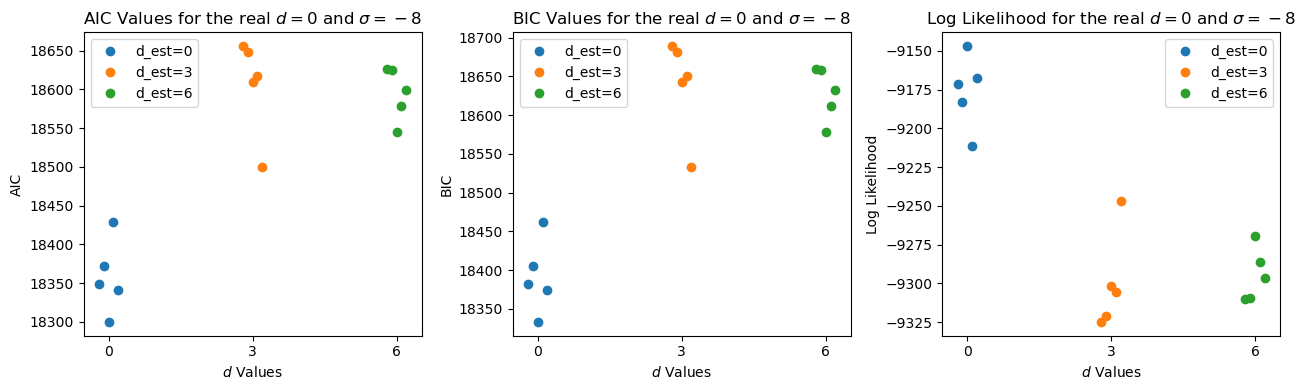

In [20]:
d_est_values = [0, 3, 6]
d_real = 0
plot_metrics_d(d_real=d_real, d_est_values=d_est_values, i = 4, figsize=(13,4))

In [25]:
# Parameters
sigma = -2
warm_up = 3000
n_iteration = 3000

d_real = 0
n = 500 
n_runs = 5
d_est_values = [0, 1, 2, 3]

pathfolder = f'runs/d_sigma_{abs(sigma)}_aic_bic_gic'
os.makedirs(pathfolder, exist_ok=True)

def run_experiment(d_real, d_est):
    params_list = []
    result_list = []

    for i in range(n_runs):
        graph_model = graph.GraphModel(n=n, d=d_real, sigma=sigma)
        graphs, spec = graph_model.populate_edges_baseline(warm_up=warm_up, max_iterations=n_iteration, patience=10)
        g = graphs[-1]
        del graphs
        gc.collect()

        est = estimator.LogitRegEstimator(g, d=d_est)
        features, labels = est.get_features_labels()
        result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

        params_list.append(params)
        result_list.append(result)

        with open(f'{pathfolder}/results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl', 'wb') as f:
            pickle.dump(result_list, f)

    return result_list

def load_results(d_real, d_est, i):
    file_name = f'results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl'
    file_path = os.path.join(pathfolder, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, 'rb') as f:
            results_array = pickle.load(f)
        return results_array
    else:
        print(f"File not found: {file_path}")
        return None

def plot_metrics_d(d_real, d_est_values, figsize=(20, 6)):
    titles = ['AIC Values', 'BIC Values', 'Log Likelihood']
    metrics = ['aic', 'bic', 'llf']
    fig, axs = plt.subplots(1, len(titles), figsize=figsize, sharey=False)
    
    for ax, title, metric in zip(axs, titles, metrics):
        for d_est in d_est_values:
            values = []
            for i in range(n_runs):
                results_array = load_results(d_real, d_est, i)
                if results_array:
                    values.extend([getattr(result, metric) for result in results_array])
            
            # Plot the metric values with some jitter for better visibility
            x_values = [d_est + (0.1 * (k - len(values)/2)) for k in range(len(values))]
            ax.scatter(x_values, values, label=f'd_est={d_est}')
        
        ax.set_xlabel('d Values')
        ax.set_title(f'{title} for the real d = {d_real} and σ = {sigma}')
        ax.set_xticks(d_est_values)
        ax.legend()

    axs[0].set_ylabel('AIC')
    axs[1].set_ylabel('BIC')
    axs[2].set_ylabel('Log Likelihood')

    plt.tight_layout()
    #plt.savefig(f'{pathfolder}/metrics_plot_dreal_{d_real}.png')
    plt.show()
    plt.close()

# Run experiments
for d_est in d_est_values:
    print(f"Running experiment for d_est = {d_est}")
    run_experiment(d_real, d_est)

print("Experiment completed and plot generated.")

Running experiment for d_est = 0
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.032      
Date:               2024-10-20 17:25 AIC:              20293.5107 
No. Observations:   124750           BIC:              20322.7129 
Df Model:           2                Log-Likelihood:   -10144.    
Df Residuals:       124747           LL-Null:          -10476.    
Converged:          1.0000           LLR p-value:      5.7323e-145
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.1066     0.0863   -70.7782   0.0000   -6.2757   -5.9375
x1         0.0104     0.0006    18.4709   0.0000    0.0093    0.0115
x2         0.0108     0.0006    18.6225   0.0000    0.0097    0.0120

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.032      
Date:               2024-10-20 17:25 AIC:              19658.8865 
No. Observations:   124750           BIC:              19688.0887 
Df Model:           2                Log-Likelihood:   -9826.4    
Df Residuals:       124747           LL-Null:          -10155.    
Converged:          1.0000           LLR p-value:      1.3885e-143
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.0040     0.0808   -74.2898   0.0000   -6.1624   -5.8456
x1         0.0100     0.0006    17.4640   0.0000    0.0089    0.0112
x2         0.0110     0.0005    19.9467   0.0000    0.0099    0.0120

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.028      
Date:               2024-10-20 17:25 AIC:              19579.8380 
No. Observations:   124750           BIC:              19609.0402 
Df Model:           2                Log-Likelihood:   -9786.9    
Df Residuals:       124747           LL-Null:          -10073.    
Converged:          1.0000           LLR p-value:      7.6575e-125
No. Iterations:     19.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.0521     0.0877   -68.9889   0.0000   -6.2241   -5.8802
x1         0.0111     0.0007    16.5014   0.0000    0.0098    0.0124
x2         0.0114     0.0006    18.0355   0.0000    0.0102    0.0126

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.034      
Date:               2024-10-20 17:25 AIC:              19227.4894 
No. Observations:   124750           BIC:              19256.6916 
Df Model:           2                Log-Likelihood:   -9610.7    
Df Residuals:       124747           LL-Null:          -9952.5    
Converged:          1.0000           LLR p-value:      3.9603e-149
No. Iterations:     24.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.1589     0.0853   -72.2060   0.0000   -6.3261   -5.9917
x1         0.0117     0.0006    18.8406   0.0000    0.0105    0.0129
x2         0.0116     0.0006    18.8461   0.0000    0.0104    0.0128

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.028      
Date:               2024-10-20 17:25 AIC:              20062.7179 
No. Observations:   124750           BIC:              20091.9201 
Df Model:           2                Log-Likelihood:   -10028.    
Df Residuals:       124747           LL-Null:          -10316.    
Converged:          1.0000           LLR p-value:      1.1785e-125
No. Iterations:     21.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.0176     0.0866   -69.4670   0.0000   -6.1874   -5.8478
x1         0.0100     0.0006    16.5106   0.0000    0.0088    0.0112
x2         0.0113     0.0006    18.2517   0.0000    0.0101    0.0125

Running 

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.032      
Date:               2024-10-20 17:25 AIC:              19130.6535 
No. Observations:   124750           BIC:              19159.8557 
Df Model:           2                Log-Likelihood:   -9562.3    
Df Residuals:       124747           LL-Null:          -9873.4    
Converged:          1.0000           LLR p-value:      7.7758e-136
No. Iterations:     23.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.1597     0.0882   -69.8087   0.0000   -6.3327   -5.9868
x1         0.0018     0.0001    18.5122   0.0000    0.0016    0.0020
x2         0.0017     0.0001    17.4389   0.0000    0.0015    0.0019

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.030      
Date:               2024-10-20 17:25 AIC:              19152.9969 
No. Observations:   124750           BIC:              19182.1991 
Df Model:           2                Log-Likelihood:   -9573.5    
Df Residuals:       124747           LL-Null:          -9869.3    
Converged:          1.0000           LLR p-value:      3.5579e-129
No. Iterations:     20.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.1491     0.0903   -68.1149   0.0000   -6.3261   -5.9722
x1         0.0017     0.0001    16.2325   0.0000    0.0015    0.0019
x2         0.0019     0.0001    18.5453   0.0000    0.0017    0.0021

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.030      
Date:               2024-10-20 17:25 AIC:              19050.8690 
No. Observations:   124750           BIC:              19080.0712 
Df Model:           2                Log-Likelihood:   -9522.4    
Df Residuals:       124747           LL-Null:          -9815.1    
Converged:          1.0000           LLR p-value:      8.0905e-128
No. Iterations:     23.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.2343     0.0941   -66.2354   0.0000   -6.4188   -6.0498
x1         0.0020     0.0001    17.7156   0.0000    0.0017    0.0022
x2         0.0019     0.0001    16.7537   0.0000    0.0016    0.0021

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.027      
Date:               2024-10-20 17:25 AIC:              19622.3272 
No. Observations:   124750           BIC:              19651.5294 
Df Model:           2                Log-Likelihood:   -9808.2    
Df Residuals:       124747           LL-Null:          -10085.    
Converged:          1.0000           LLR p-value:      5.2332e-121
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.1966     0.0951   -65.1822   0.0000   -6.3829   -6.0102
x1         0.0018     0.0001    17.1339   0.0000    0.0016    0.0020
x2         0.0018     0.0001    16.6961   0.0000    0.0016    0.0020

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.030      
Date:               2024-10-20 17:25 AIC:              19669.7438 
No. Observations:   124750           BIC:              19698.9460 
Df Model:           2                Log-Likelihood:   -9831.9    
Df Residuals:       124747           LL-Null:          -10139.    
Converged:          1.0000           LLR p-value:      4.7243e-134
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.1873     0.0914   -67.7232   0.0000   -6.3664   -6.0083
x1         0.0017     0.0001    17.4142   0.0000    0.0015    0.0019
x2         0.0017     0.0001    18.0550   0.0000    0.0015    0.0019

Running 

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.028      
Date:               2024-10-20 17:25 AIC:              19809.3107 
No. Observations:   124750           BIC:              19838.5129 
Df Model:           2                Log-Likelihood:   -9901.7    
Df Residuals:       124747           LL-Null:          -10188.    
Converged:          1.0000           LLR p-value:      2.9451e-125
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.6030     0.2086   -41.2407   0.0000   -9.0119   -8.1942
x1         0.0009     0.0001    16.2560   0.0000    0.0008    0.0011
x2         0.0009     0.0001    15.3319   0.0000    0.0008    0.0010

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.032      
Date:               2024-10-20 17:25 AIC:              19605.6749 
No. Observations:   124750           BIC:              19634.8771 
Df Model:           2                Log-Likelihood:   -9799.8    
Df Residuals:       124747           LL-Null:          -10126.    
Converged:          1.0000           LLR p-value:      1.3962e-142
No. Iterations:     24.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.7244     0.2070   -42.1418   0.0000   -9.1302   -8.3187
x1         0.0009     0.0001    16.5008   0.0000    0.0008    0.0010
x2         0.0009     0.0001    16.2695   0.0000    0.0008    0.0010

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.035      
Date:               2024-10-20 17:26 AIC:              18892.6487 
No. Observations:   124750           BIC:              18921.8509 
Df Model:           2                Log-Likelihood:   -9443.3    
Df Residuals:       124747           LL-Null:          -9790.0    
Converged:          1.0000           LLR p-value:      2.6654e-151
No. Iterations:     26.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.4673     0.1889   -44.8331   0.0000   -8.8374   -8.0971
x1         0.0009     0.0001    15.7817   0.0000    0.0008    0.0010
x2         0.0010     0.0001    18.0918   0.0000    0.0009    0.0011

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.036      
Date:               2024-10-20 17:26 AIC:              18566.4444 
No. Observations:   124750           BIC:              18595.6466 
Df Model:           2                Log-Likelihood:   -9280.2    
Df Residuals:       124747           LL-Null:          -9626.8    
Converged:          1.0000           LLR p-value:      3.0497e-151
No. Iterations:     24.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.4425     0.1876   -44.9920   0.0000   -8.8102   -8.0747
x1         0.0010     0.0001    17.1354   0.0000    0.0009    0.0011
x2         0.0010     0.0001    16.6475   0.0000    0.0009    0.0011

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.034      
Date:               2024-10-20 17:26 AIC:              19416.6276 
No. Observations:   124750           BIC:              19445.8298 
Df Model:           2                Log-Likelihood:   -9705.3    
Df Residuals:       124747           LL-Null:          -10044.    
Converged:          1.0000           LLR p-value:      1.0765e-147
No. Iterations:     27.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.7964     0.2051   -42.8816   0.0000   -9.1985   -8.3944
x1         0.0009     0.0001    17.1081   0.0000    0.0008    0.0011
x2         0.0010     0.0001    16.4758   0.0000    0.0008    0.0011

Experime

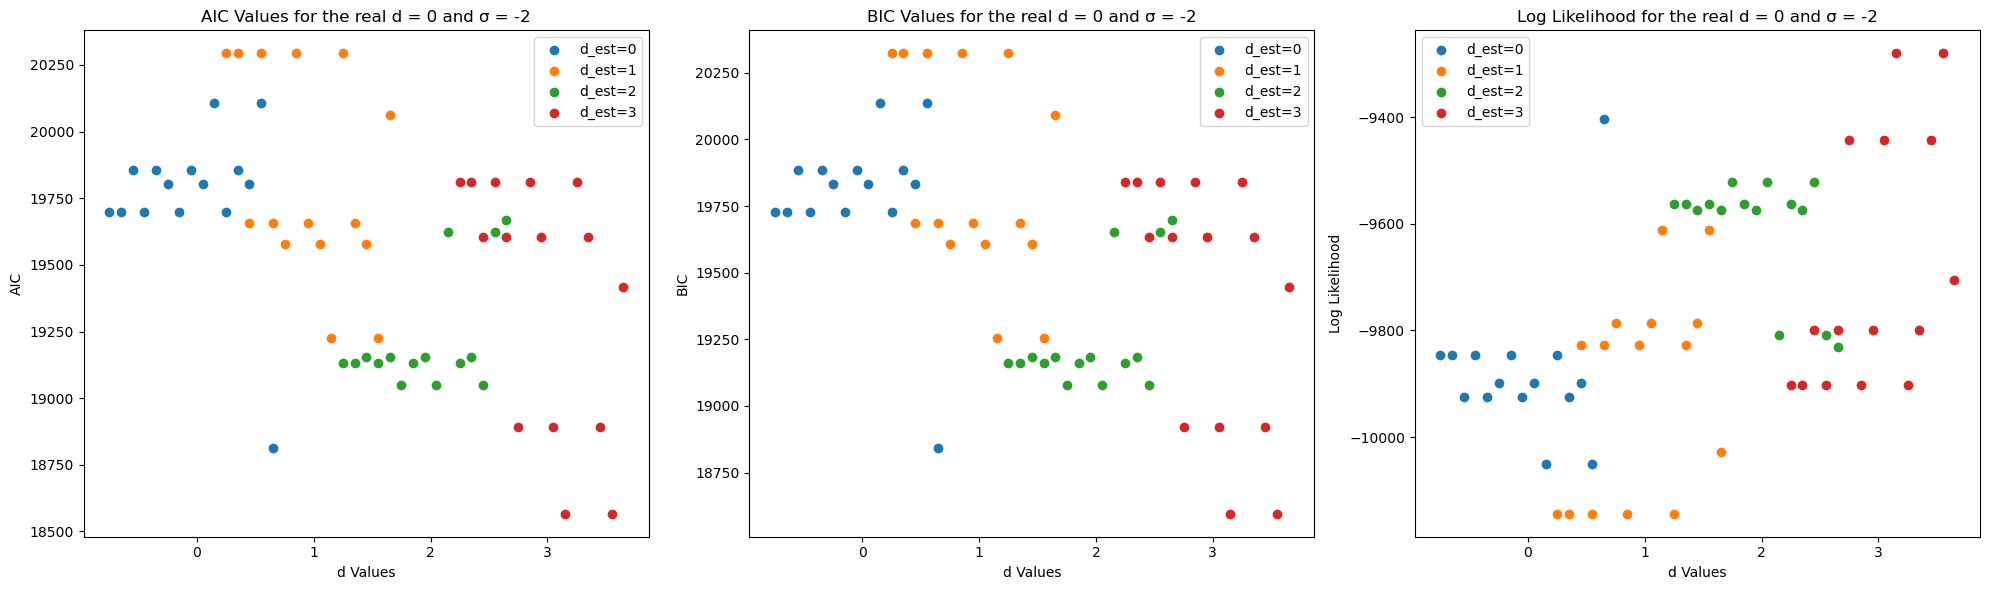

In [31]:
def plot_metrics_d(d_real, d_est_values, figsize=(20, 6)):
    titles = ['AIC Values', 'BIC Values', 'Log Likelihood']
    metrics = ['aic', 'bic', 'llf']
    fig, axs = plt.subplots(1, len(titles), figsize=figsize, sharey=False)
    
    for ax, title, metric in zip(axs, titles, metrics):
        for d_est in d_est_values:
            values = []
            for i in range(n_runs):
                results_array = load_results(d_real, d_est, i)
                if results_array:
                    values.extend([getattr(result, metric) for result in results_array])
            
            # Plot the metric values with some jitter for better visibility
            x_values = [d_est + (0.1 * (k - len(values)/2)) for k in range(len(values))]
            ax.scatter(x_values, values, label=f'd_est={d_est}')
        
        ax.set_xlabel('d Values')
        ax.set_title(f'{title} for the real d = {d_real} and σ = {sigma}')
        ax.set_xticks(d_est_values)
        ax.legend()

    axs[0].set_ylabel('AIC')
    axs[1].set_ylabel('BIC')
    axs[2].set_ylabel('Log Likelihood')

    plt.tight_layout()
    #plt.savefig(f'{pathfolder}/metrics_plot_dreal_{d_real}.png')
    plt.show()
    plt.close()


plot_metrics_d(d_real, d_est_values, figsize=(20, 6))

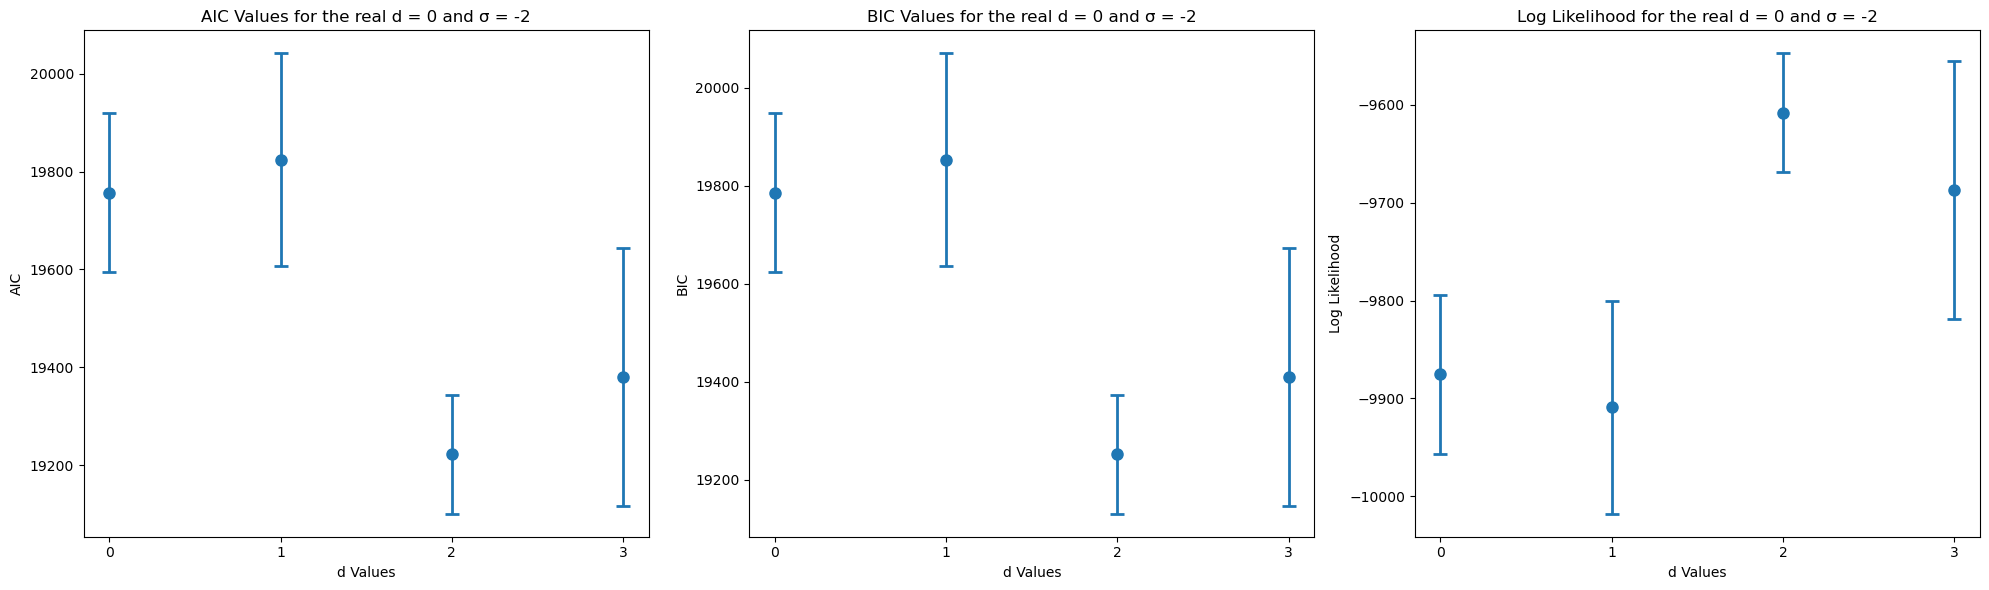

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_metrics_d(d_real, d_est_values, figsize=(20, 6)):
    titles = ['AIC Values', 'BIC Values', 'Log Likelihood']
    metrics = ['aic', 'bic', 'llf']
    fig, axs = plt.subplots(1, len(titles), figsize=figsize, sharey=False)
    
    for ax, title, metric in zip(axs, titles, metrics):
        means = []
        errors = []
        for d_est in d_est_values:
            values = []
            for i in range(n_runs):
                results_array = load_results(d_real, d_est, i)
                if results_array:
                    values.extend([getattr(result, metric) for result in results_array])
            
            mean = np.mean(values)
            sem = stats.sem(values)
            ci = stats.t.interval(0.95, len(values)-1, loc=mean, scale=sem)
            
            means.append(mean)
            errors.append((mean - ci[0], ci[1] - mean))
        
        # Plot mean and confidence interval
        ax.errorbar(d_est_values, means, yerr=np.array(errors).T,
                    fmt='o', capsize=5, capthick=2, elinewidth=2, markersize=8)
        
        ax.set_xlabel('d Values')
        ax.set_title(f'{title} for the real d = {d_real} and σ = {sigma}')
        ax.set_xticks(d_est_values)

    axs[0].set_ylabel('AIC')
    axs[1].set_ylabel('BIC')
    axs[2].set_ylabel('Log Likelihood')

    plt.tight_layout()
    plt.show()
    plt.close()

# Call the function
plot_metrics_d(d_real, d_est_values, figsize=(20, 6))